# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [6]:
# Analisando tamanho da base de dados
sinasc_raw.shape

(27028, 69)

In [7]:
# Analisando tamanho da base de dados
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [8]:
# Consultando tipo de informação na variável
sinasc_raw['munResNome']

0          Alta Floresta D'Oeste
1          Alta Floresta D'Oeste
2          Alta Floresta D'Oeste
3        Alto Alegre dos Parecis
4          Alta Floresta D'Oeste
                  ...           
27023                    Vilhena
27024                Chupinguaia
27025                    Vilhena
27026                    Vilhena
27027    Novo Horizonte do Oeste
Name: munResNome, Length: 27028, dtype: object

In [240]:
# Contanto o total de partos por municípios
sinasc_raw['munResNome'].value_counts()

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [9]:
# Analisando informação inconsistente
sinasc_raw[sinasc_raw['munResNome'] == 'Município ignorado - RO']

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
1863,1,2496046.0,110004,1,24,5.0,8 a 11 anos,752105.0,1.0,1.0,...,1,1881,IGNOR,IGNOR,Município ignorado - RO,Rondônia,NaN,NaN,NaN,NaN


In [10]:
# Após análise inicial da base, identifiquei uma linha muito 'ruim' e estou excluindo abaixo a linha
sinasc_raw.drop(sinasc_raw[sinasc_raw['munResNome'] == 'Município ignorado - RO'].index, inplace=True)

In [11]:
# Validando exclusão da linha ruim
sinasc_raw['munResNome'].value_counts()

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [12]:
sinasc_raw.shape

(27027, 69)

In [13]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27027 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27027 non-null  int64  
 1   CODESTAB      26912 non-null  float64
 2   CODMUNNASC    27027 non-null  int64  
 3   LOCNASC       27027 non-null  int64  
 4   IDADEMAE      27027 non-null  int64  
 5   ESTCIVMAE     26710 non-null  float64
 6   ESCMAE        26715 non-null  object 
 7   CODOCUPMAE    24120 non-null  float64
 8   QTDFILVIVO    25454 non-null  float64
 9   QTDFILMORT    24929 non-null  float64
 10  CODMUNRES     27027 non-null  int64  
 11  GESTACAO      25795 non-null  object 
 12  GRAVIDEZ      26948 non-null  object 
 13  PARTO         26978 non-null  object 
 14  CONSULTAS     27027 non-null  int64  
 15  DTNASC        27027 non-null  object 
 16  HORANASC      27006 non-null  float64
 17  SEXO          27023 non-null  object 
 18  APGAR1        26931 non-nu

In [30]:
sinasc_raw['ESCMAE'].isna().sum()

312

In [34]:
sinasc_raw.dropna(subset=['ESCMAE'], inplace=True)

In [35]:
sinasc_raw['ESCMAE'].isna().sum()

0

In [36]:
sinasc_raw['SEXO'].isna().sum()

4

In [37]:
sinasc_raw.dropna(subset=['SEXO'], inplace=True)

In [38]:
sinasc_raw['SEXO'].isna().sum()

0

In [42]:
sinasc_raw['IDADEPAI'].isna().sum()

19169

In [43]:
sinasc_raw.dropna(subset=['IDADEPAI'], inplace=True)

In [44]:
sinasc_raw['IDADEPAI'].isna().sum()

0

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [45]:
# Criando um novo df com apenas 3 variáveis
sinasc_raw_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']].copy()
sinasc_raw_1

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27021,25,38.0,Colorado do Oeste
27022,34,33.0,Vilhena
27023,32,35.0,Vilhena
27025,24,30.0,Vilhena


In [46]:
# Avaliando o total de mães por idade
sinasc_raw_1['IDADEMAE'].value_counts().head(10)

27    438
25    438
26    432
29    423
28    411
22    397
23    389
24    379
32    371
30    361
Name: IDADEMAE, dtype: int64

In [47]:
# Verificando qtde de linhas em branco por variável
sinasc_raw_1[['IDADEMAE', 'IDADEPAI', 'munResNome']].isna().sum()

IDADEMAE      0
IDADEPAI      0
munResNome    0
dtype: int64

In [48]:
sinasc_raw_1.shape

(7542, 3)

In [49]:
# Calculando idade media das mães e dos pais por município
result = sinasc_raw_1.groupby('munResNome').mean().sort_values(by = 'IDADEPAI', ascending=False)
result

,IDADEMAE,IDADEPAI
munResNome,,
Itapuã do Oeste,32.000000,43.428571
Cacaulândia,31.000000,36.333333
Pimenteiras do Oeste,32.600000,35.600000
Monte Negro,26.761905,34.666667
Colorado do Oeste,31.161290,34.354839
Cabixi,32.166667,34.333333
Vilhena,30.611765,34.152941
Vale do Anari,27.133333,34.000000
Ministro Andreazza,27.890411,33.849315


In [50]:
result.shape

(52, 2)

Text(0, 0.5, 'Idade média')

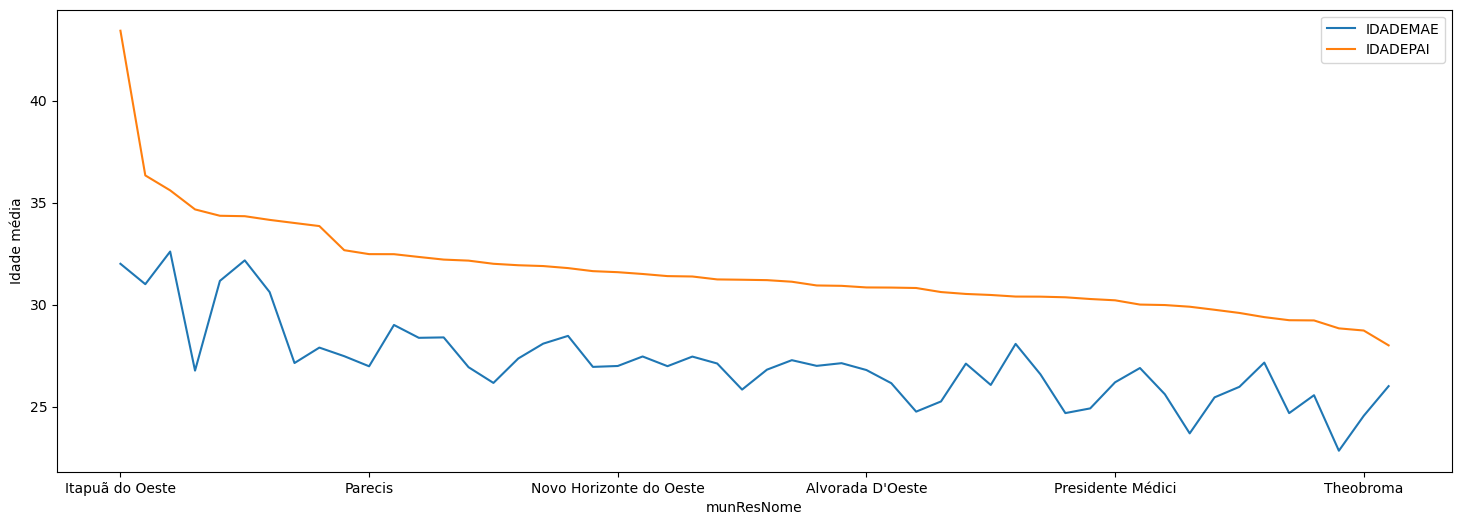

In [51]:
#Analisando resposta com gráfico
result.plot(figsize=[18,6])
plt.ylabel('Idade média')

In [52]:
sinasc_raw_1

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27021,25,38.0,Colorado do Oeste
27022,34,33.0,Vilhena
27023,32,35.0,Vilhena
27025,24,30.0,Vilhena


In [53]:
# Criando nova variável para calcular a dferença de idade do pai e da mãe
sinasc_raw_1['DIFERIDADE'] = sinasc_raw_1['IDADEPAI'] - sinasc_raw_1['IDADEMAE']
sinasc_raw_1

,IDADEMAE,IDADEPAI,munResNome,DIFERIDADE
0,19,26.0,Alta Floresta D'Oeste,7.0
1,29,24.0,Alta Floresta D'Oeste,-5.0
2,37,32.0,Alta Floresta D'Oeste,-5.0
3,30,24.0,Alto Alegre dos Parecis,-6.0
4,30,27.0,Alta Floresta D'Oeste,-3.0
...,...,...,...,...
27021,25,38.0,Colorado do Oeste,13.0
27022,34,33.0,Vilhena,-1.0
27023,32,35.0,Vilhena,3.0
27025,24,30.0,Vilhena,6.0


In [54]:
# Realizando filtro e organizando em ordem decrescente
sinasc_raw_1[sinasc_raw_1['IDADEPAI'] > 60].sort_values(by='DIFERIDADE', ascending=False)

,IDADEMAE,IDADEPAI,munResNome,DIFERIDADE
2546,32,86.0,Espigão D'Oeste,54.0
15411,20,64.0,Cacoal,44.0
13225,36,73.0,Itapuã do Oeste,37.0
19335,31,68.0,Pimenta Bueno,37.0
9749,26,62.0,Porto Velho,36.0
15901,34,66.0,Cacoal,32.0
2268,38,70.0,Pimenta Bueno,32.0
1944,29,61.0,Cacoal,32.0
8190,33,65.0,Porto Velho,32.0
5079,36,67.0,Teixeirópolis,31.0


Em uma análise inicial no gráfico e na tabela acima, é possível encontrar uma certa diferença de idade do pai e da mãe, sendo importante avaliar e se necessário realizar algum refinamento na limpeza da base.

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [55]:
# Analisando a base de dados
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [117]:
# Criando uma cópia do DF mais resumida
sinasc_raw_2 = sinasc_raw[['ESCMAE', 'DTNASC', 'SEXO', 'PESO']].copy()
sinasc_raw_2

,ESCMAE,DTNASC,SEXO,PESO
0,8 a 11 anos,2019-02-19,Masculino,3685
1,8 a 11 anos,2019-02-21,Feminino,3055
2,8 a 11 anos,2019-02-25,Feminino,3460
3,12 anos ou mais,2019-03-20,Feminino,2982
4,8 a 11 anos,2019-03-23,Feminino,3310
...,...,...,...,...
27021,12 anos ou mais,2019-11-20,Feminino,3300
27022,12 anos ou mais,2019-11-21,Masculino,2215
27023,12 anos ou mais,2019-12-13,Masculino,2110
27025,8 a 11 anos,2019-08-02,Masculino,3065


In [118]:
# Avaliando a qtde de NaN
sinasc_raw_2.isna().sum()

ESCMAE    0
DTNASC    0
SEXO      0
PESO      0
dtype: int64

In [119]:
# Consultando a dimensão do dataframe
sinasc_raw.shape

(7542, 69)

In [120]:
# Analisando mais informações do dataframe
sinasc_raw_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7542 entries, 0 to 27026
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ESCMAE  7542 non-null   object
 1   DTNASC  7542 non-null   object
 2   SEXO    7542 non-null   object
 3   PESO    7542 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 552.6+ KB


In [121]:
# Peso médio dos bebes por sexo que nasceram no dia do meu aniversário por faixas de escolaridade mae
sinasc_data = sinasc_raw_2[sinasc_raw_2['DTNASC'] == '2019-01-05'].groupby(['DTNASC','ESCMAE', 'SEXO'])['PESO'].mean()
sinasc_data

DTNASC      ESCMAE           SEXO     
2019-01-05  1 a 3 anos       Masculino    3690.000000
            12 anos ou mais  Masculino    3337.500000
            4 a 7 anos       Feminino     3085.000000
                             Masculino    2275.000000
            8 a 11 anos      Feminino     3273.333333
                             Masculino    3270.000000
Name: PESO, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [122]:
# Criando novo df para responder as questões 3 e 4
sinasc_raw_3 = sinasc_raw[['DTNASC', 'munResNome', 'IDADEMAE', 'IDADEPAI', 'QTDFILVIVO']].copy()
sinasc_raw_3

,DTNASC,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO
0,2019-02-19,Alta Floresta D'Oeste,19,26.0,0.0
1,2019-02-21,Alta Floresta D'Oeste,29,24.0,1.0
2,2019-02-25,Alta Floresta D'Oeste,37,32.0,2.0
3,2019-03-20,Alto Alegre dos Parecis,30,24.0,0.0
4,2019-03-23,Alta Floresta D'Oeste,30,27.0,1.0
...,...,...,...,...,...
27021,2019-11-20,Colorado do Oeste,25,38.0,1.0
27022,2019-11-21,Vilhena,34,33.0,0.0
27023,2019-12-13,Vilhena,32,35.0,1.0
27025,2019-08-02,Vilhena,24,30.0,0.0


In [123]:
# Analisando a qtde de nascimento por município
sinasc_raw_3.groupby('munResNome')['DTNASC'].count().sort_values()

munResNome
Rio Crespo                      1
Pimenteiras do Oeste            5
Alto Paraíso                    6
Cabixi                          6
Cacaulândia                     6
Itapuã do Oeste                 7
Governador Jorge Teixeira       9
Cujubim                         9
Theobroma                      11
Ariquemes                      14
Vale do Anari                  15
Guajará-Mirim                  17
Corumbiara                     17
Candeias do Jamari             19
Monte Negro                    21
Chupinguaia                    26
Castanheiras                   28
Campo Novo de Rondônia         28
Colorado do Oeste              31
Seringueiras                   33
Primavera de Rondônia          36
São Francisco do Guaporé       36
Parecis                        38
Nova Mamoré                    38
Vale do Paraíso                43
Costa Marques                  44
Teixeirópolis                  44
Nova Brasilândia D'Oeste       48
São Felipe D'Oeste             48
Bur

In [124]:
# Analisando a possibilidades para trazer a resposta com o valor mínimo
sinasc_raw_3.groupby('munResNome')['DTNASC'].count().min()

1

In [125]:
# Resposta
# O municipio onde nasceu menos bebe em 2019 foi:
sinasc_raw_3.groupby('munResNome')['DTNASC'].count().sort_values().head(1)

munResNome
Rio Crespo    1
Name: DTNASC, dtype: int64

In [126]:
# qual a idade media, maxima, minima das maes nos municípios
sinasc_raw_3.groupby('munResNome').aggregate({'IDADEMAE': ['min', np.mean,'max'], 'IDADEPAI': ['min', np.mean,'max']})

IDADEMAE                IDADEPAI                 
                               min       mean max      min       mean   max
munResNome                                                                 
Alta Floresta D'Oeste           14  25.966887  53     17.0  29.589404  58.0
Alto Alegre dos Parecis         14  24.676692  41     16.0  29.233083  50.0
Alto Paraíso                    16  22.833333  32     21.0  28.833333  49.0
Alvorada D'Oeste                15  26.790000  40     17.0  30.840000  52.0
Ariquemes                       15  27.357143  36     20.0  31.928571  51.0
Buritis                         16  24.750000  42     18.0  30.812500  49.0
Cabixi                          18  32.166667  38     19.0  34.333333  47.0
Cacaulândia                     18  31.000000  42     28.0  36.333333  50.0
Cacoal                          14  26.994440  47     17.0  30.937252  66.0
Campo Novo de Rondônia          17  24.678571  40     21.0  30.357143  40.0
Candeias do Jamari              15  23.684211  34     21.0  29.894737  41.0
Castanheiras                    18  28.071429  39     17.0  30.392857  43.0
Cerejeiras                      15  28.464789  42     19.0  31.788732  52.0
Chupinguaia                     17  27.153846  38     20.0  29.384615  46.0
Colorado do Oeste               23  31.161290  41     23.0  34.354839  53.0
Corumbiara                      17  29.000000  43     21.0  32.470588  52.0
Costa Marques                   17  25.250000  41     17.0  30.613636  60.0
Cujubim                         17  26.888889  37     19.0  30.000000  39.0
Espigão D'Oeste                 14  26.808176  44     16.0  31.198113  86.0
Governador Jorge Teixeira       17  25.555556  34     22.0  29.222222  37.0
Guajará-Mirim                   19  26.058824  39     19.0  30.470588  44.0
Itapuã do Oeste                 27  32.000000  39     25.0  43.428571  73.0
Jaru                            15  28.390071  44     19.0  32.205674  62.0
Ji-Paraná                       13  27.273256  44     15.0  31.120155  63.0
Machadinho D'Oeste              13  25.831683  40     17.0  31.217822  53.0
Ministro Andreazza              17  27.890411  44     21.0  33.849315  55.0
Mirante da Serra                16  26.928571  41     20.0  32.154762  56.0
Monte Negro                     15  26.761905  40     20.0  34.666667  55.0
Nova Brasilândia D'Oeste        15  27.104167  38     20.0  30.520833  48.0
Nova Mamoré                     15  26.157895  46     19.0  32.000000  43.0
Nova União                      16  27.449275  39     18.0  31.376812  53.0
Novo Horizonte do Oeste         16  26.988235  41     20.0  31.588235  56.0
Ouro Preto do Oeste             14  27.109920  44     17.0  31.233244  60.0
Parecis                         17  26.973684  41     18.0  32.473684  61.0
Pimenta Bueno                   13  25.449807  47     16.0  29.745174  70.0
Pimenteiras do Oeste            27  32.600000  40     25.0  35.600000  45.0
Porto Velho                     12  28.369697  44     16.0  32.334848  65.0
Presidente Médici               15  26.188776  43     16.0  30.209184  64.0
Primavera de Rondônia           17  28.083333  39     21.0  31.888889  44.0
Rio Crespo                      26  26.000000  26     28.0  28.000000  28.0
Rolim de Moura                  14  26.576784  44     16.0  30.388150  69.0
Santa Luzia D'Oeste             15  26.144444  41     18.0  30.833333  53.0
Seringueiras                    15  24.909091  39     20.0  30.272727  47.0
São Felipe D'Oeste              17  26.979167  41     18.0  31.395833  57.0
São Francisco do Guaporé        15  26.944444  40     19.0  31.638889  54.0
São Miguel do Guaporé           17  27.469136  42     19.0  32.666667  60.0
Teixeirópolis                   16  27.454545  39     20.0  31.500000  67.0
Theobroma                       19  24.545455  38     23.0  28.727273  40.0
Urupá                           15  27.126126  43     17.0  30.918919  48.0
Vale do Anari                   17  27.133333  39     23.0  34.000000  58.

In [127]:
# Após identificar o município que nasceu menos bebê, realizando filtro em novo dataframe para dar continuidade no exercício
sinasc_raw_4 = sinasc_raw_3[sinasc_raw_3['munResNome'] == 'Rio Crespo']

In [128]:
# Respondente em um única célula a com as informações da mãe e do pai
sinasc_raw_4.groupby('munResNome').aggregate({'IDADEMAE': ['min', np.mean,'max'], 'IDADEPAI': ['min', np.mean,'max']})

IDADEMAE           IDADEPAI            
                min  mean max      min  mean   max
munResNome                                        
Rio Crespo       26  26.0  26     28.0  28.0  28.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [102]:
# Para resolução do exercício 4, irei converter a variável DTNASC para datetime
sinasc_raw_3.dtypes

DTNASC         object
munResNome     object
IDADEMAE        int64
IDADEPAI      float64
QTDFILVIVO    float64
dtype: object

In [107]:
# Realizando a conversão
sinasc_raw_3['DTNASC'] = pd.to_datetime(sinasc_raw_3['DTNASC'])

In [108]:
# Validando o novo tipo de dado
sinasc_raw_3.dtypes

DTNASC        datetime64[ns]
munResNome            object
IDADEMAE              object
IDADEPAI              object
QTDFILVIVO            object
dtype: object

In [109]:
# Analisando dataframe
sinasc_raw_3

,DTNASC,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO
0,2019-02-19,Alta Floresta D'Oeste,19,26.0,0.0
1,2019-02-21,Alta Floresta D'Oeste,29,24.0,1.0
2,2019-02-25,Alta Floresta D'Oeste,37,32.0,2.0
3,2019-03-20,Alto Alegre dos Parecis,30,24.0,0.0
4,2019-03-23,Alta Floresta D'Oeste,30,27.0,1.0
...,...,...,...,...,...
27022,2019-11-21,Vilhena,34,33.0,0.0
27023,2019-12-13,Vilhena,32,35.0,1.0
27025,2019-08-02,Vilhena,24,30.0,0.0
27026,2019-12-23,Vilhena,21,24.0,1.0


In [110]:
# Fazendo primeira análise com a tentativa de ir alterando o index do df com os dados da variável DTNASC
sinasc_raw_3.set_index('DTNASC', inplace=True)

In [111]:
# Resultado aplicado com sucesso no df
sinasc_raw_3

,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO
DTNASC,,,,
2019-02-19,Alta Floresta D'Oeste,19,26.0,0.0
2019-02-21,Alta Floresta D'Oeste,29,24.0,1.0
2019-02-25,Alta Floresta D'Oeste,37,32.0,2.0
2019-03-20,Alto Alegre dos Parecis,30,24.0,0.0
2019-03-23,Alta Floresta D'Oeste,30,27.0,1.0
...,...,...,...,...
2019-11-21,Vilhena,34,33.0,0.0
2019-12-13,Vilhena,32,35.0,1.0
2019-08-02,Vilhena,24,30.0,0.0


In [112]:
# Excluindo linha com NaT
if pd.NaT in sinasc_raw_3.index:
    sinasc_raw_3 = sinasc_raw_3.drop(pd.NaT)

In [113]:
# Avaliando exclusão realizada com sucesso
sinasc_raw_3

,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO
DTNASC,,,,
2019-02-19,Alta Floresta D'Oeste,19,26.0,0.0
2019-02-21,Alta Floresta D'Oeste,29,24.0,1.0
2019-02-25,Alta Floresta D'Oeste,37,32.0,2.0
2019-03-20,Alto Alegre dos Parecis,30,24.0,0.0
2019-03-23,Alta Floresta D'Oeste,30,27.0,1.0
...,...,...,...,...
2019-11-20,Colorado do Oeste,25,38.0,1.0
2019-11-21,Vilhena,34,33.0,0.0
2019-12-13,Vilhena,32,35.0,1.0


In [144]:
# Avaliando o novo índice
sinasc_raw_3.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            27009, 27010, 27013, 27019, 27020, 27021, 27022, 27023, 27025,
            27026],
           dtype='int64', length=7542)

In [145]:
# Refazendo análise com outro raciocínio fazendo o filtro do mês pela variável DTNASC
sinasc_raw_3_mar = sinasc_raw_3[(sinasc_raw_3['DTNASC'] >= '2019-03-01') & (sinasc_raw_3['DTNASC'] <= '2019-03-31')].sort_values(by='DTNASC')
sinasc_raw_3_mar

,DTNASC,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO
6818,2019-03-01,Porto Velho,38,41.0,2.0
1823,2019-03-01,Cacoal,25,29.0,1.0
5781,2019-03-01,Rolim de Moura,25,36.0,0.0
1822,2019-03-01,Pimenta Bueno,29,36.0,1.0
5783,2019-03-01,Pimenta Bueno,32,37.0,1.0
...,...,...,...,...,...
1718,2019-03-31,Pimenta Bueno,29,34.0,0.0
13487,2019-03-31,São Francisco do Guaporé,15,19.0,0.0
4125,2019-03-31,Ji-Paraná,24,29.0,1.0
4124,2019-03-31,Ji-Paraná,21,22.0,1.0


In [154]:
# Verificando o municipio que nasceu mais bebe no mês de março
sinasc_raw_3_mar_2 = sinasc_raw_3_mar.groupby('munResNome')['DTNASC'].count().sort_values(ascending=False)
sinasc_raw_3_mar_2

munResNome
Cacoal                      122
Ji-Paraná                    95
Rolim de Moura               66
Porto Velho                  60
Pimenta Bueno                54
Ouro Preto do Oeste          40
Espigão D'Oeste              30
Buritis                      26
Alta Floresta D'Oeste        24
Vilhena                      16
Presidente Médici            14
Urupá                        13
Machadinho D'Oeste           13
Nova Mamoré                  10
Alvorada D'Oeste             10
Jaru                         10
Cerejeiras                    9
Alto Alegre dos Parecis       9
Santa Luzia D'Oeste           7
Campo Novo de Rondônia        7
Vale do Paraíso               6
Ministro Andreazza            6
Parecis                       5
Chupinguaia                   5
Novo Horizonte do Oeste       5
Monte Negro                   5
Colorado do Oeste             4
Castanheiras                  4
Primavera de Rondônia         4
São Felipe D'Oeste            4
Nova Brasilândia D'Oeste     

In [153]:
# Verificando o municipio que nasceu mais bebe no mês de março
sinasc_raw_3_mar.groupby('munResNome')['DTNASC'].count().sort_values(ascending=False).head(1)

munResNome
Cacoal    122
Name: DTNASC, dtype: int64

In [158]:
# Filtrando df por mun = 'Cacoal'
sinasc_raw_3_mar_2 = sinasc_raw_3_mar[sinasc_raw_3_mar['munResNome'] == 'Cacoal']
sinasc_raw_3_mar_2

,DTNASC,munResNome,IDADEMAE,IDADEPAI,QTDFILVIVO
1823,2019-03-01,Cacoal,25,29.0,1.0
1793,2019-03-01,Cacoal,28,44.0,1.0
1697,2019-03-02,Cacoal,39,38.0,1.0
1995,2019-03-02,Cacoal,22,30.0,0.0
1840,2019-03-02,Cacoal,19,29.0,1.0
...,...,...,...,...,...
1836,2019-03-29,Cacoal,19,28.0,0.0
1711,2019-03-30,Cacoal,29,22.0,2.0
1710,2019-03-30,Cacoal,17,25.0,0.0
1712,2019-03-30,Cacoal,25,25.0,0.0


In [176]:
# Quantidade de filhos vivos com a media, maxima, minima nesse municipio
sinasc_raw_3_mar_2.groupby('DTNASC').aggregate({'QTDFILVIVO': ['count', 'mean', 'max', 'min']})

QTDFILVIVO                    
                count      mean  max  min
DTNASC                                   
2019-03-01          2  1.000000  1.0  1.0
2019-03-02          7  0.571429  2.0  0.0
2019-03-03          1  3.000000  3.0  3.0
2019-03-04          7  0.428571  1.0  0.0
2019-03-05          3  3.000000  5.0  0.0
2019-03-06          4  0.500000  1.0  0.0
2019-03-07          6  0.333333  1.0  0.0
2019-03-08          5  1.400000  3.0  0.0
2019-03-09          3  0.666667  1.0  0.0
2019-03-10          2  2.000000  3.0  1.0
2019-03-11          5  1.800000  3.0  0.0
2019-03-12          4  1.000000  2.0  0.0
2019-03-13          1  1.000000  1.0  1.0
2019-03-14         10  1.300000  3.0  0.0
2019-03-15          5  1.400000  3.0  0.0
2019-03-16          6  0.833333  2.0  0.0
2019-03-17          4  0.500000  1.0  0.0
2019-03-18          7  0.714286  3.0  0.0
2019-03-19          5  0.600000  2.0  0.0
2019-03-20          2  3.500000  7.0  0.0
2019-03-21          4  0.000000  0.0  0.0
2019-03-22          5  0.800000  2.0  0.0
2019-03-23          1  1.000000  1.0  1.0
2019-03-24          1  1.000000  1.0  1.0
2019-03-25          5  0.600000  1.0  0.0
2019-03-27          2  0.000000  0.0  0.0
2019-03-28          5  0.800000  1.0  0.0
2019-03-29          6  0.666667  1.0  0.0
2019-03-30          3  0.666667  2.0  0.0
2019-03-31          1  0.000000  0.0  0.0

Text(0, 0.5, 'Qtde Filhos Vivos')

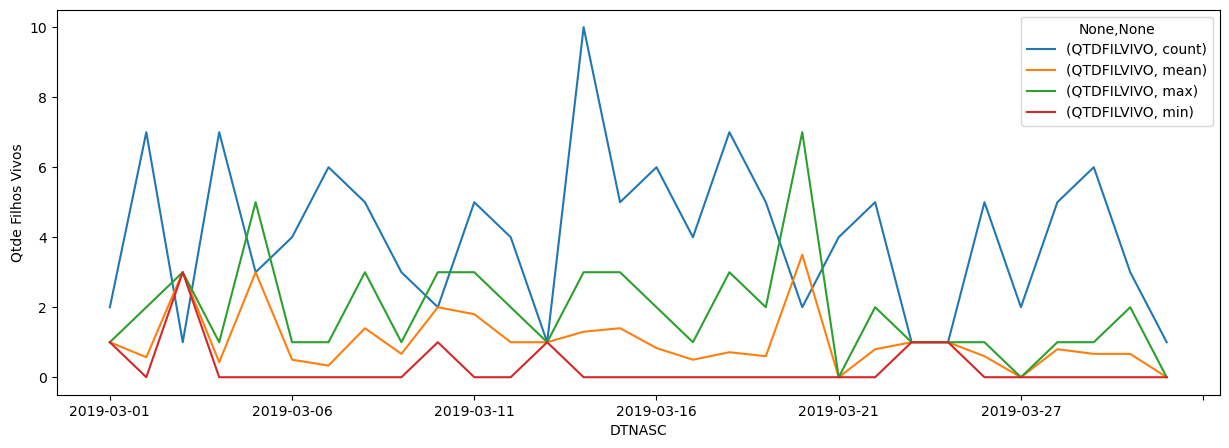

In [175]:
sinasc_raw_3_mar_2.groupby('DTNASC').aggregate({'QTDFILVIVO': ['count', 'mean', 'max', 'min']}).plot(figsize=[15,5])
plt.ylabel('Qtde Filhos Vivos')

Com a análise no df e gráfico foi possível identificar que no meio período do mês teve um pico com a qtde filhos vivos.

In [180]:
# Idade media, maxima, minima dos pais nesse municipio
sinasc_raw_3_mar_2.groupby('DTNASC').aggregate({'IDADEPAI': ['mean', 'max', 'min']})

IDADEPAI            
                 mean   max   min
DTNASC                           
2019-03-01  36.500000  44.0  29.0
2019-03-02  28.857143  38.0  17.0
2019-03-03  25.000000  25.0  25.0
2019-03-04  29.428571  41.0  17.0
2019-03-05  33.333333  37.0  30.0
2019-03-06  26.750000  30.0  21.0
2019-03-07  28.666667  47.0  22.0
2019-03-08  33.200000  44.0  25.0
2019-03-09  31.666667  36.0  23.0
2019-03-10  29.500000  34.0  25.0
2019-03-11  28.000000  33.0  21.0
2019-03-12  27.500000  31.0  22.0
2019-03-13  32.000000  32.0  32.0
2019-03-14  32.400000  43.0  25.0
2019-03-15  31.200000  43.0  25.0
2019-03-16  28.500000  35.0  18.0
2019-03-17  29.500000  38.0  24.0
2019-03-18  27.571429  34.0  19.0
2019-03-19  34.800000  39.0  30.0
2019-03-20  35.500000  40.0  31.0
2019-03-21  25.250000  35.0  20.0
2019-03-22  32.800000  46.0  20.0
2019-03-23  33.000000  33.0  33.0
2019-03-24  39.000000  39.0  39.0
2019-03-25  29.000000  41.0  18.0
2019-03-27  27.500000  32.0  23.0
2019-03-28  30.200000  47.0  17.0
2019-03-29  31.166667  38.0  23.0
2019-03-30  24.000000  25.0  22.0
2019-03-31  20.000000  20.0  20.0

<Axes: xlabel='DTNASC'>

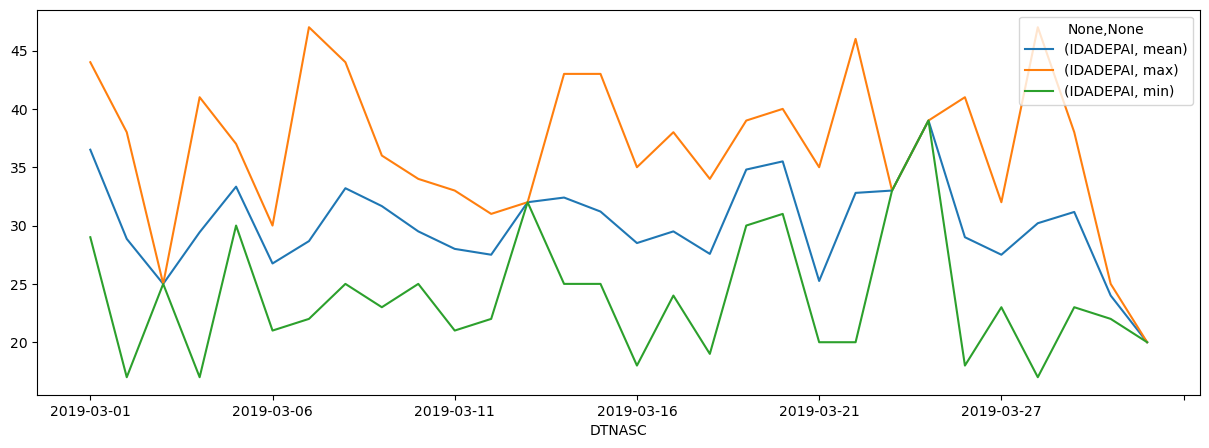

In [181]:
sinasc_raw_3_mar_2.groupby('DTNASC').aggregate({'IDADEPAI': ['mean', 'max', 'min']}).plot(figsize=[15,5])

In [189]:
sinasc_raw_3_mar_2['IDADEPAI'].mean()

30.008196721311474

Confirmando o que o gráfico já estava informando, a média da idade dos pais no período de março e na cidade Cacoal foi de 30 anos.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [190]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27021,12 anos ou mais,37 a 41 semanas,Única,Vaginal,2019-11-20,Feminino,Branca,2020-01-21,NaN,3.2.01,2020-01-27,ATIVO,MUNIC,Colorado do Oeste,Rondônia
27022,12 anos ou mais,32 a 36 semanas,Única,Vaginal,2019-11-21,Masculino,Branca,2020-09-29,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia


In [191]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [199]:
# Analisando base de dados
sinasc_raw['RACACOR'].value_counts() / 7542

Parda       0.635508
Branca      0.276187
Preta       0.041236
Indígena    0.014452
Amarela     0.007823
Name: RACACOR, dtype: float64

<Axes: >

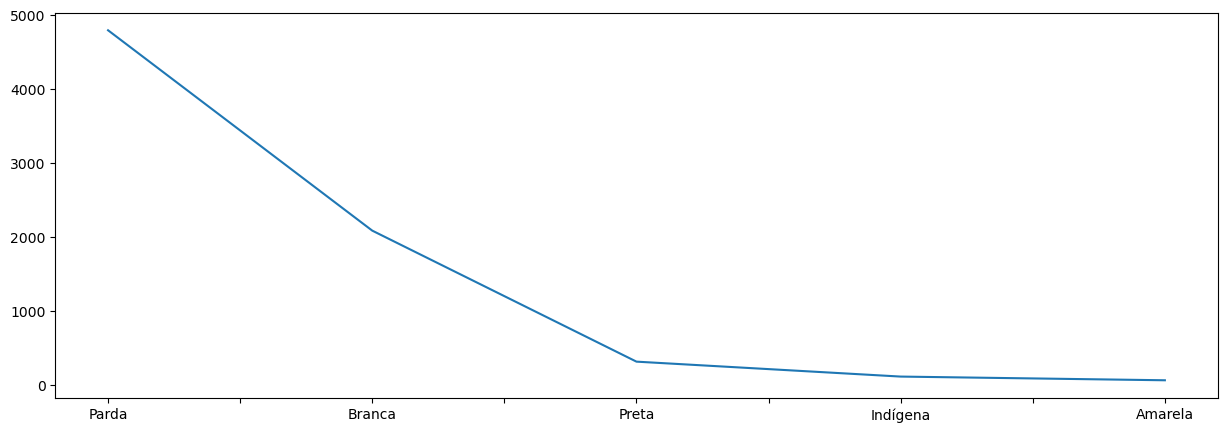

In [196]:
# Analisando gráfico
sinasc_raw['RACACOR'].value_counts().plot(figsize=[15,5])

Identificamos nesta base que a 90% da base são de crianças de raça Parda ou Branca e a minoria da raça Preta, Indígena e Amarela.

In [201]:
# Analisado tipo de gravidez X tempo de gestação
sinasc_raw.groupby(['GESTACAO', 'GRAVIDEZ', 'PARTO'])['GRAVIDEZ'].count()

GESTACAO             GRAVIDEZ  PARTO  
22 a 27 semanas      Dupla     Vaginal       1
                     Única     Cesáreo       6
                               Vaginal      10
28 a 31 semanas      Dupla     Cesáreo       4
                     Única     Cesáreo      14
                               Vaginal       6
32 a 36 semanas      Dupla     Cesáreo      46
                               Vaginal       6
                     Única     Cesáreo     366
                               Vaginal     126
37 a 41 semanas      Dupla     Cesáreo      36
                     Única     Cesáreo    5248
                               Vaginal    1125
42 semanas e mais    Única     Cesáreo     151
                               Vaginal      65
Menos de 22 semanas  Única     Cesáreo       2
Name: GRAVIDEZ, dtype: int64

In [ ]:
# Análise 01 - Identificamos que o parto cesário é predominante na base, e a realização do parto normal é muito baixo.
# Análise 02 - Não temos casos de gravidez tipo Trigêmeo ou mais.
# Análise 03 - É possível perceber também que gravidez de gêmeos é maior entre gestação de 32 a 36 semanas